<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 65px">

# ACT vs SAT:<br> An Exploratory Analysis to GDP

# Background

SAT and ACT are standardized tests required by colleges and universities in the United States as part of their admission process. [ACT](https://www.act.org/content/act/en.html) is administered by ACT Inc and has 4 sections comprising English, Math, Reading, and Science, while [SAT](https://collegereadiness.collegeboard.org/sat) is administered by College Board and has 2 sections which is Evidence Based Reading and Writing (EBRW) and Math.

Standardized test has been a controversial topic. Despite the rise of test-optional admission, over 2.2 million students in class 2019 took SAT and more than 52% took ACT in 2019. The intend of a standardize test is to measure college readiness and provide universities and colleges with a common data points of the applicant.

Many questions the objectivity on these tests with the rise of the [famous Varsity Blue scandal](https://www.nytimes.com/2021/10/09/us/varsity-blues-scandal-verdict.html), while there are some who still believe that these tests are able to [predict how well students perform on their freshment year](https://www.ucop.edu/institutional-research-academic-planning/_files/sat-act-study-report.pdf). College Board and ACT have argued that **this standardized tests open opportunities** to merit-based scholarships which can eventually reduce the disparity between higher and lower income.

In March 2016, new format for SAT was released to capture more test-takers share from ACT who has been the preferred test since 2012. Therefore, looking at the previous data from 2017-2019 for both ACT and SAT, we will to explore on how effective this initiative is.

[discrepancy of resource accessibility with respect to their household income](https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html).

# Table of Contents
- [Background](#Background)
- [Dataset Chosen](#dataset-chosen)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Data Dictionary](#data-dictionary)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#conclusion)

# Problem Statement

College Board is looking for **recommendations on increasing the participation rates.** 
As part of College Board staff, we would like to make informed decision on which State we need to focus to increase participation by exploring the past 2017-2019 data for both SAT and ACT.

*Which state should College Board put more attention to?*

# Dataset Chosen


> The cadence of interest in this study will be between 2017-2019 for both ACT and SAT.

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Participation Rates and Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Participation Rates and Scores by State
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Participation Rates and Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Participation Rates and Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Participation Rates and Scores by State
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Participation Rates and Scores by State

> Outside Research: <br>
Real Gross Domestic Product (GDP) is an inflation-adjusted measurement of goods and services produced used as one of the proxy for economic capacability of that particulatr state. Keeping in mind that we might be doing a generalization in this analysis due to outliers on each state. In this study, we will use Real GDP per capita by state as a measure of wealth in that state. This means that the higher the real GDP per capita of the state, the wealthier it is.
<br> Aside from that, to be strategical on our next decision, we shall look at the latest state standardized test preference

* [`GDP US.csv`](./data/GDP_US.csv): 2017-2019 Real GDP per Capita by State. [Source](https://apps.bea.gov/iTable/)
* [`act_or_sat`](./data/act_or_sat.csv): States Required Test for High School Student. [Source](https://www.edweek.org/teaching-learning/what-tests-does-each-state-require)

# Data Import and Cleaning

>Methodology: <br>
1. Importing the required datasets and understanding the integrity of the data
2. Understanding the statistical characteristics of our data
3. Fixing any error such as handling missing values, duplicates and invalid input.

### Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
#Importing ACT data
act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')
act_2019 = pd.read_csv('../data/act_2019.csv')

In [3]:
#Importing SAT data
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

In [4]:
#Importing real GDP per capita by state
gdp = pd.read_csv('../data/GDP_US.csv')

In [5]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [6]:
act_2017.info() #composite is stored as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [7]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [8]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [9]:
act_2019.head()

,State,Participation,Composite
0,Alabama,100%,18.9
1,Alaska,38%,20.1
2,Arizona,73%,19.0
3,Arkansas,100%,19.3
4,California,23%,22.6


In [10]:
act_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [11]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [12]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [13]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [14]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [15]:
sat_2019.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134
3,Arkansas,6%,582,559,1141
4,California,63%,534,531,1065


In [16]:
sat_2019.info() #more data in 2019, will set this as the left hand side on merging the datasets to check the discrepancies

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   State               53 non-null     object
 1   Participation Rate  53 non-null     object
 2   EBRW                53 non-null     int64 
 3   Math                53 non-null     int64 
 4   Total               53 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


### Data Cleaning

Problems in ACT data:
- ACT 2017: Dropping English, Math, Reading and Science columns as we will be focusing on the total score instead
- ACT 2017: 'Pariticipation Rate' column is in object type
- ACT 2018: Duplicates for Maine

Problems in SAT data:
- Dropping 'Puerto Rico' and 'Virgin Island' rows as there are missing values
- SAT participation is in object type


### ACT Data Clean Up

In [17]:
# Fixing the ACT columns to match with every datasets
act_2017 = act_2017.rename(columns={'State':'state','Participation':'act_participation_17','Composite':'act_total_17'})
act_2018 = act_2018.rename(columns={'State':'state','Participation':'act_participation_18','Composite':'act_total_18'})
act_2019 = act_2019.rename(columns={'State':'state','Participation':'act_participation_19','Composite':'act_total_19'})

In [18]:
# Checking any missing values 
act_2017.isnull().sum()

state                   0
act_participation_17    0
English                 0
Math                    0
Reading                 0
Science                 0
act_total_17            0
dtype: int64

In [19]:
act_2018.isnull().sum()

state                   0
act_participation_18    0
act_total_18            0
dtype: int64

In [20]:
act_2019.isnull().sum()

state                   0
act_participation_19    0
act_total_19            0
dtype: int64

In [21]:
# Checking any duplicate
print(act_2017.duplicated().sum())
print(act_2018.duplicated().sum()) #find 1 duplicate in act2018
print(act_2019.duplicated().sum())

0
1
0


In [22]:
# ACT 2017: Dropping English, Math, Reading and Science columns as we will be focusing on the total score instead
act_2017.drop(['English','Math','Reading','Science'],axis=1,inplace=True) # we will see for composite value


In [23]:
# ACT 2017: 'Pariticipation Rate' column is in object type
act_2017[40:]

,state,act_participation_17,act_total_17
40,Rhode Island,21%,24.0
41,South Carolina,100%,18.7
42,South Dakota,80%,21.8
43,Tennessee,100%,19.8
44,Texas,45%,20.7
45,Utah,100%,20.3
46,Vermont,29%,23.6
47,Virginia,29%,23.8
48,Washington,29%,21.9
49,West Virginia,69%,20.4


In [24]:
def clean_compo(x):
    return re.findall(r'^(\d{0,2}\.\d{1})?',x)[0]

In [25]:
act_2017['act_total_17'] = act_2017['act_total_17'].apply(lambda x: float(clean_compo(x)))

In [26]:
act_2017.info() #we can see that now act_total_17 is float instead of object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 52 non-null     object 
 1   act_participation_17  52 non-null     object 
 2   act_total_17          52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [27]:
# ACT 2018: Duplicates for Maine
act_2018[act_2018.duplicated()==True]

,state,act_participation_18,act_total_18
20,Maine,7%,24.0


In [28]:
act_2018[18:22]

,state,act_participation_18,act_total_18
18,Louisiana,100%,19.2
19,Maine,7%,24.0
20,Maine,7%,24.0
21,Maryland,31%,22.5


In [29]:
act_2018.drop_duplicates(inplace=True) #dropping the duplicate

In [30]:
# Merging ACT Data
act_1718 = pd.merge(left=act_2017,right=act_2018,on='state',how='left')
act = pd.merge(left=act_1718,right=act_2019,on='state',how='left')

,state,act_participation_17,act_total_17,act_participation_18,act_total_18,act_participation_19,act_total_19
0,National,60%,21.0,NaN,NaN,52%,20.7
1,Alabama,100%,19.2,100%,19.1,100%,18.9
2,Alaska,65%,19.8,33%,20.8,38%,20.1
3,Arizona,62%,19.7,66%,19.2,73%,19.0
4,Arkansas,100%,19.4,100%,19.4,100%,19.3
5,California,31%,22.8,27%,22.7,23%,22.6
6,Colorado,100%,20.8,30%,23.9,27%,23.8
7,Connecticut,31%,25.2,26%,25.6,22%,25.5
8,Delaware,18%,24.1,17%,23.8,13%,24.1
9,District of Columbia,32%,24.2,NaN,NaN,32%,23.5


In [31]:
act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 52 non-null     object 
 1   act_participation_17  52 non-null     object 
 2   act_total_17          52 non-null     float64
 3   act_participation_18  50 non-null     object 
 4   act_total_18          50 non-null     float64
 5   act_participation_19  52 non-null     object 
 6   act_total_19          52 non-null     float64
dtypes: float64(3), object(4)
memory usage: 3.2+ KB


In [32]:
# observe District of Columbia in 2018 is missing 
act_2018[:10]

,state,act_participation_18,act_total_18
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6
9,Florida,66%,19.9


In [33]:
act_2018.at[8,'state'] = 'District of Columbia'

In [34]:
act_1718 = pd.merge(left=act_2017,right=act_2018,on='state',how='left')
act = pd.merge(left=act_1718,right=act_2019,on='state',how='left')
act[:10]

,state,act_participation_17,act_total_17,act_participation_18,act_total_18,act_participation_19,act_total_19
0,National,60%,21.0,NaN,NaN,52%,20.7
1,Alabama,100%,19.2,100%,19.1,100%,18.9
2,Alaska,65%,19.8,33%,20.8,38%,20.1
3,Arizona,62%,19.7,66%,19.2,73%,19.0
4,Arkansas,100%,19.4,100%,19.4,100%,19.3
5,California,31%,22.8,27%,22.7,23%,22.6
6,Colorado,100%,20.8,30%,23.9,27%,23.8
7,Connecticut,31%,25.2,26%,25.6,22%,25.5
8,Delaware,18%,24.1,17%,23.8,13%,24.1
9,District of Columbia,32%,24.2,32%,23.6,32%,23.5


In [35]:
#dropping missing values
act.dropna(axis=0,inplace=True)

In [36]:
#converting percentage to float
def perc_to_float(x):
    return float(x.strip()[:-1])

In [37]:
perc_to_float('50%')

50.0

In [38]:
act_participation = ['act_participation_17','act_participation_18','act_participation_19']

for part_yr in act_participation:
    act[part_yr] = act[part_yr].apply(lambda x: perc_to_float(x))

In [39]:
act.head()

,state,act_participation_17,act_total_17,act_participation_18,act_total_18,act_participation_19,act_total_19
1,Alabama,100.0,19.2,100.0,19.1,100.0,18.9
2,Alaska,65.0,19.8,33.0,20.8,38.0,20.1
3,Arizona,62.0,19.7,66.0,19.2,73.0,19.0
4,Arkansas,100.0,19.4,100.0,19.4,100.0,19.3
5,California,31.0,22.8,27.0,22.7,23.0,22.6


In [40]:
act.describe() #Each section in ACT test will be scored between 1-36 and the score will be the mean of those 4 sections.

,act_participation_17,act_total_17,act_participation_18,act_total_18,act_participation_19,act_total_19
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,61.725490,21.496078,58.666667,21.464706
std,32.140842,2.020695,34.037085,2.111583,34.515890,2.194523
min,8.000000,17.800000,7.000000,17.700000,6.000000,17.900000
25%,31.000000,19.800000,28.500000,19.950000,24.500000,19.800000
50%,69.000000,21.400000,66.000000,21.300000,54.000000,21.100000
75%,100.000000,23.600000,100.000000,23.650000,100.000000,23.700000
max,100.000000,25.500000,100.000000,25.600000,100.000000,25.500000


### SAT Data Clean Up

In [41]:
# Fixing the SAT columns to match with every datasets
sat_2017 = sat_2017.rename(columns={'State':'state','Participation':'sat_participation_17','Total':'sat_total_17'})
sat_2018 = sat_2018.rename(columns={'State':'state','Participation':'sat_participation_18','Total':'sat_total_18'})
sat_2019 = sat_2019.rename(columns={'State':'state','Participation Rate':'sat_participation_19','Total':'sat_total_19'})

In [42]:
# Dropping subject specific columns
sat_2017.drop(['Evidence-Based Reading and Writing','Math'],axis=1,inplace=True)
sat_2018.drop(['Evidence-Based Reading and Writing','Math'],axis=1,inplace=True)
sat_2019.drop(['EBRW','Math'],axis=1,inplace=True)

In [43]:
sat_1918 = pd.merge(sat_2019,sat_2018,how='left',on='state')
sat = pd.merge(sat_1918,sat_2017,how='left',on='state')

In [44]:
sat.head()

,state,sat_participation_19,sat_total_19,sat_participation_18,sat_total_18,sat_participation_17,sat_total_17
0,Alabama,7%,1143,6%,1166.0,5%,1165.0
1,Alaska,41%,1097,43%,1106.0,38%,1080.0
2,Arizona,31%,1134,29%,1149.0,30%,1116.0
3,Arkansas,6%,1141,5%,1169.0,3%,1208.0
4,California,63%,1065,60%,1076.0,53%,1055.0


In [45]:
#Dropping 'Puerto Rico' and 'Virgin Island' rows as there are missing values

sat.dropna(axis=0,inplace=True)

In [46]:
#returning sat total 2017 and 2018 to initial integer type
sat_total = ['sat_total_18', 'sat_total_17']

for total in sat_total:
    sat[total] = sat[total].apply(lambda x: int(x))

In [47]:
sat.info() #observed 2 null object on sat participation in 2018

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 51 non-null     object
 1   sat_participation_19  51 non-null     object
 2   sat_total_19          51 non-null     int64 
 3   sat_participation_18  51 non-null     object
 4   sat_total_18          51 non-null     int64 
 5   sat_participation_17  51 non-null     object
 6   sat_total_17          51 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 3.2+ KB


In [48]:
sat[sat['sat_participation_18'].isnull()] 

,state,sat_participation_19,sat_total_19,sat_participation_18,sat_total_18,sat_participation_17,sat_total_17


In [49]:
#SAT participation is in object type, needs to be converted to float
sat_participation = ['sat_participation_17','sat_participation_18','sat_participation_19']

for part_yr in sat_participation:
    sat[part_yr] = sat[part_yr].apply(lambda x: perc_to_float(x))

In [50]:
sat.describe() #score must be between 400-1600 as the range of score score for each EBRW and Math section is 200-800 each, so data is within a good range

,sat_participation_19,sat_total_19,sat_participation_18,sat_total_18,sat_participation_17,sat_total_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,49.058824,1113.078431,45.745098,1120.019608,39.803922,1126.098039
std,38.747600,97.197910,37.314256,94.155083,35.276632,92.494812
min,2.000000,943.000000,2.000000,977.000000,2.000000,950.000000
25%,5.500000,1038.000000,4.500000,1057.500000,4.000000,1055.500000
50%,54.000000,1097.000000,52.000000,1098.000000,38.000000,1107.000000
75%,82.000000,1210.000000,77.500000,1204.000000,66.000000,1212.000000
max,100.000000,1284.000000,100.000000,1298.000000,100.000000,1295.000000


### Real GDP per Capita Data

In [51]:
#renaming the column
gdp = gdp.rename(columns={'State':'state','GDP_17':'gdp_17','GDP_18':'gdp_18','GDP_19':'gdp_19'})

In [52]:
gdp.head()

,state,gdp_17,gdp_18,gdp_19
0,Alabama,37508,40279,41389
1,Alaska,63610,70635,74422
2,Arizona,39583,42096,44161
3,Arkansas,36714,38467,39580
4,California,60359,67698,70662


### ACT or SAT Preference for Each State 

In [53]:
act_or_sat = pd.read_csv('../data/act_or_sat.csv')

In [54]:
act_or_sat.head()

,State,3-8 Test,High School Test,Exit Exam?,Notes
0,Alabama,Scantron,"pre-ACT, ACT, ACT WorkKeys",No,NaN
1,Alaska,Performance Evaluation for Alaska's Schools (P...,PEAKS,No,NaN
2,Arizona,AZMerit,AZMerit end-of-course exam or substitutes,No,"Districts may substitute other tests, such as ..."
3,Arkansas,ACT Aspire,ACT Aspire,No,"All districts must offer ACT, but students not..."
4,California,Smarter Balanced,Smarter Balanced,No,NaN


In [55]:
def prefer(x):
    preference = []
    x_split = x.split(' ')
    for i in x_split:
        if ('ACT' in i) and ('ACT' not in preference):
            preference.append('ACT')
        elif ('SAT' in i) and ('SAT' not in preference):
            preference.append('SAT')
    return ','.join(preference) if preference!=[] else 'No Preference'

In [56]:
act_or_sat['preference'] = act_or_sat['High School Test'].apply(lambda x: prefer(x))

In [57]:
#clean the column
act_or_sat = act_or_sat.rename(columns={'State':'state'})

In [58]:
preference_df=act_or_sat[['state','preference']]

### Merging ACT, SAT, and GDP data

In [59]:
test = pd.merge(act,sat)

In [60]:
test.set_index('state').head()

,act_participation_17,act_total_17,act_participation_18,act_total_18,act_participation_19,act_total_19,sat_participation_19,sat_total_19,sat_participation_18,sat_total_18,sat_participation_17,sat_total_17
state,,,,,,,,,,,,
Alabama,100.0,19.2,100.0,19.1,100.0,18.9,7.0,1143,6.0,1166,5.0,1165
Alaska,65.0,19.8,33.0,20.8,38.0,20.1,41.0,1097,43.0,1106,38.0,1080
Arizona,62.0,19.7,66.0,19.2,73.0,19.0,31.0,1134,29.0,1149,30.0,1116
Arkansas,100.0,19.4,100.0,19.4,100.0,19.3,6.0,1141,5.0,1169,3.0,1208
California,31.0,22.8,27.0,22.7,23.0,22.6,63.0,1065,60.0,1076,53.0,1055


In [61]:
test_gdp = pd.merge(test,gdp,how='left',on='state')

In [62]:
test_gdp = pd.merge(test_gdp,preference_df,how='left',on='state')

In [63]:
test_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   act_participation_17  51 non-null     float64
 2   act_total_17          51 non-null     float64
 3   act_participation_18  51 non-null     float64
 4   act_total_18          51 non-null     float64
 5   act_participation_19  51 non-null     float64
 6   act_total_19          51 non-null     float64
 7   sat_participation_19  51 non-null     float64
 8   sat_total_19          51 non-null     int64  
 9   sat_participation_18  51 non-null     float64
 10  sat_total_18          51 non-null     int64  
 11  sat_participation_17  51 non-null     float64
 12  sat_total_17          51 non-null     int64  
 13  gdp_17                51 non-null     int64  
 14  gdp_18                51 non-null     int64  
 15  gdp_19                51 

# Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*string*|ACT 2017|State where ACT and SAT data collected| 
|**act_participation_17**|*float*|ACT 2017|Percentage participant rate in 2017(out of 100%)| 
|**act_total_17**|*float*|ACT 2017|Average ACT composite score (1-36)| 
|**act_participation_18**|*float*|ACT 2018|Percentage participant rate in 2018 (out of 100%)| 
|**act_total_18**|*float*|ACT 2018|Average ACT composite score (1-36)| 
|**act_participation_19**|*float*|ACT 2019|Percentage participant rate in 2019(out of 100%)| 
|**act_total_19**|*float*|ACT 2019|Average ACT composite score (1-36)| 
|**sat_participation_17**|*float*|SAT 2017|Percentage participant rate in 2017(out of 100%)| 
|**sat_total_17**|*integer*|SAT 2017|Average SAT total score (400-1600)| 
|**sat_participation_18**|*float*|SAT 2018|Percentage participant rate in 2018(out of 100%)| 
|**sat_total_18**|*integer*|SAT 2018|Average SAT total score (400-1600)| 
|**sat_participation_19**|*float*|SAT 2019|Percentage participant rate in 2019(out of 100%)| 
|**sat_total_19**|*integer*|SAT 2019|Average SAT total score (400-1600)| 
|**gdp_17**|*integer*|BEA|Real Gross Domestic Product by state in 2017, measured in chained 2012 dollars| 
|**gdp_18**|*integer*|BEA|Real Gross Domestic Product by state in 2018, measured in chained 2012 dollars| 
|**gdp_19**|*integer*|BEA|Real Gross Domestic Product by state in 2019, measured in chained 2012 dollars| 
|**gdp_17_cat**|*object*|BEA|Real GDP catergories by state in 2017 (<$40k,$40-50k,$50-60k,$60-70k,>$70k| 
|**gdp_18_cat**|*object*|BEA|Real GDP catergories by state in 2018 (<$40k,$40-50k,$50-60k,$60-70k,>$70k| 
|**gdp_19_cat**|*object*|BEA|Real GDP catergories by state in 2019 (<$40k,$40-50k,$50-60k,$60-70k,>$70k| 
|**preference**|*object*|EducationWeeK|Inclination towards ACT or SAT by state in 2019| 



# Exploratory Data Analysis

### Exploring states with participation rate of 100%

In [64]:
from copy import deepcopy

def state_100(dataset,column,test,year):
    states = []
    states_series = dataset[dataset[column]==100]['state']
    state_list = deepcopy(states)
    for each_state in range(0,int(states_series.count())):
        state_list.append(states_series.values[each_state])
            
    print (f"{', '.join(state_list)}: states with 100% participation rate in {test} {year}. There are {states_series.count()} states")

In [65]:
state_100(test_gdp,'sat_participation_17','SAT',2017)
state_100(test_gdp,'sat_participation_18','SAT',2018)
state_100(test_gdp,'sat_participation_19','SAT',2019)

Connecticut, Delaware, District of Columbia, Michigan: states with 100% participation rate in SAT 2017. There are 4 states
Colorado, Connecticut, Delaware, Idaho, Michigan: states with 100% participation rate in SAT 2018. There are 5 states
Colorado, Connecticut, Delaware, Florida, Idaho, Illinois, Michigan, Rhode Island: states with 100% participation rate in SAT 2019. There are 8 states


In [66]:
state_100(test_gdp,'act_participation_17','ACT',2017)
state_100(test_gdp,'act_participation_18','ACT',2018)
state_100(test_gdp,'act_participation_19','ACT',2019)

Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming: states with 100% participation rate in ACT 2017. There are 17 states
Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming: states with 100% participation rate in ACT 2018. There are 17 states
Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, Tennessee, Utah, Wisconsin, Wyoming: states with 100% participation rate in ACT 2019. There are 15 states


In [67]:
test_gdp[test_gdp['state']=='Colorado'][['state','act_participation_17','act_participation_18','act_participation_19','sat_participation_17','sat_participation_18','sat_participation_19']]

,state,act_participation_17,act_participation_18,act_participation_19,sat_participation_17,sat_participation_18,sat_participation_19
5,Colorado,100.0,30.0,27.0,11.0,100.0,100.0


In [68]:
test_gdp[test_gdp['state']=='Ohio'][['state','act_participation_17','act_participation_18','act_participation_19','sat_participation_17','sat_participation_18','sat_participation_19']]

,state,act_participation_17,act_participation_18,act_participation_19,sat_participation_17,sat_participation_18,sat_participation_19
35,Ohio,75.0,100.0,100.0,12.0,18.0,19.0


- Conneticut, Delaware and Michigan are states that have been requiring SAT for their high school graduates so it is expected that they have 100% participation rates throughout the years.
- Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Montana, Nevada, North Carolina, Oklahoma, Tennessee, Utah, Winconsin and Wyoming are states that have been requiring ACT for their high school graduates so it is expected that they have 100% participation rates throughout the years.
- **ACT has more states that have 100% participation rates than SAT.** 
There are 17 states with full participation in 2017 and 2018 but dropped to 15 states in 2019. On the other hand, the number of states with full SAT participation has been increasing from 2017 with 4 states to 8 states in 2019. This is one of a good indication 
- **Colorado suddent jumped** in 2018 can be explained by the new state requirement for [11th grade students in Colorado to take SAT](https://www.montrosepress.com/free_access/do-new-state-imposed-graduation-requirements-help-prepare-students-for-life-after-high-school-or/article_a9035efc-4d8f-11ec-bc99-6f83adfb36c5.html) as part of their graduation criteria
- Although Ohio has imposed test requirement for the student (either ACT or SAT), we can see that ACT remains the preferred test compared to SAT in those 3 years.

#### Indicating that **state regulation** is a strong factor on drastic participatio rate increase in one state

### Exploring states with highest scores

In [69]:
print('ACT 2017 average total score is %.2f' % test_gdp['act_total_17'].mean())
print('ACT 2018 average total score is %.2f' % test_gdp['act_total_18'].mean())
print('ACT 2019 average total score is %.2f' % test_gdp['act_total_19'].mean())
print('SAT 2017 average total score is %.2f' % test_gdp['sat_total_17'].mean())
print('SAT 2018 average total score is %.2f' % test_gdp['sat_total_18'].mean())
print('SAT 2019 average total score is %.2f' % test_gdp['sat_total_19'].mean())

ACT 2017 average total score is 21.52
ACT 2018 average total score is 21.50
ACT 2019 average total score is 21.46
SAT 2017 average total score is 1126.10
SAT 2018 average total score is 1120.02
SAT 2019 average total score is 1113.08


In [70]:
def top_score(dataset,column):
    return dataset.sort_values(by=[column],ascending=False)[['state',column.replace('total','participation'),column]].head()

In [71]:
top_score(test_gdp,'act_total_17')

,state,act_participation_17,act_total_17
29,New Hampshire,18.0,25.5
21,Massachusetts,29.0,25.4
6,Connecticut,31.0,25.2
19,Maine,8.0,24.3
8,District of Columbia,32.0,24.2


In [72]:
top_score(test_gdp,'act_total_18')

,state,act_participation_18,act_total_18
6,Connecticut,26.0,25.6
21,Massachusetts,25.0,25.5
29,New Hampshire,16.0,25.1
32,New York,27.0,24.5
22,Michigan,22.0,24.2


In [73]:
top_score(test_gdp,'act_total_19')

,state,act_participation_19,act_total_19
21,Massachusetts,21.0,25.5
6,Connecticut,22.0,25.5
29,New Hampshire,14.0,25.0
39,Rhode Island,12.0,24.7
32,New York,22.0,24.5


In [74]:
top_score(test_gdp,'sat_total_17')

,state,sat_participation_17,sat_total_17
23,Minnesota,3.0,1295
49,Wisconsin,3.0,1291
15,Iowa,2.0,1275
25,Missouri,3.0,1271
16,Kansas,4.0,1260


In [75]:
top_score(test_gdp,'sat_total_18')

,state,sat_participation_18,sat_total_18
23,Minnesota,4.0,1298
49,Wisconsin,3.0,1294
34,North Dakota,2.0,1283
15,Iowa,3.0,1265
16,Kansas,4.0,1265


In [76]:
top_score(test_gdp,'sat_total_19')

,state,sat_participation_19,sat_total_19
23,Minnesota,4.0,1284
49,Wisconsin,3.0,1283
41,South Dakota,3.0,1268
34,North Dakota,2.0,1263
27,Nebraska,3.0,1260


- Top 3 for ACT scores are Massachusettes, Conneticut and New Hampshire. These states are part of the northeastern and interestingly these 3 states don't have ACT as their mandatory requirement:
    - Massachusettes has no requirement on any test as they are using the MCAS (Massachusetts Comprehensice Assessment System). Ths is explained by the low participation rate
    - Connecticut and New Hampsire are states that require SAT
- Top 2 for SAT scores are Minnesota and Winconsin. The low participation rates data is also observed in these 2 states.
    - Minnesota has no requirement on any test
    - Winconsin is state that requrie ACT

However states with top scorer has a very low participation rates, SAT top states have less than 5% participation and ACT top states have less than 30%.
#### Limitations of the Analysis
It shows that these scores might **only represent small fraction of the students at a given state (selection bias)**. Thus, we need to be careful on how we analyse the top scorer. (setting threshold at least 50% participation rate on our data visualization analysis and we will show more on why this threshold might help us analyze the data)

# Data Visualization

### Investigating the Correlation of Datasets

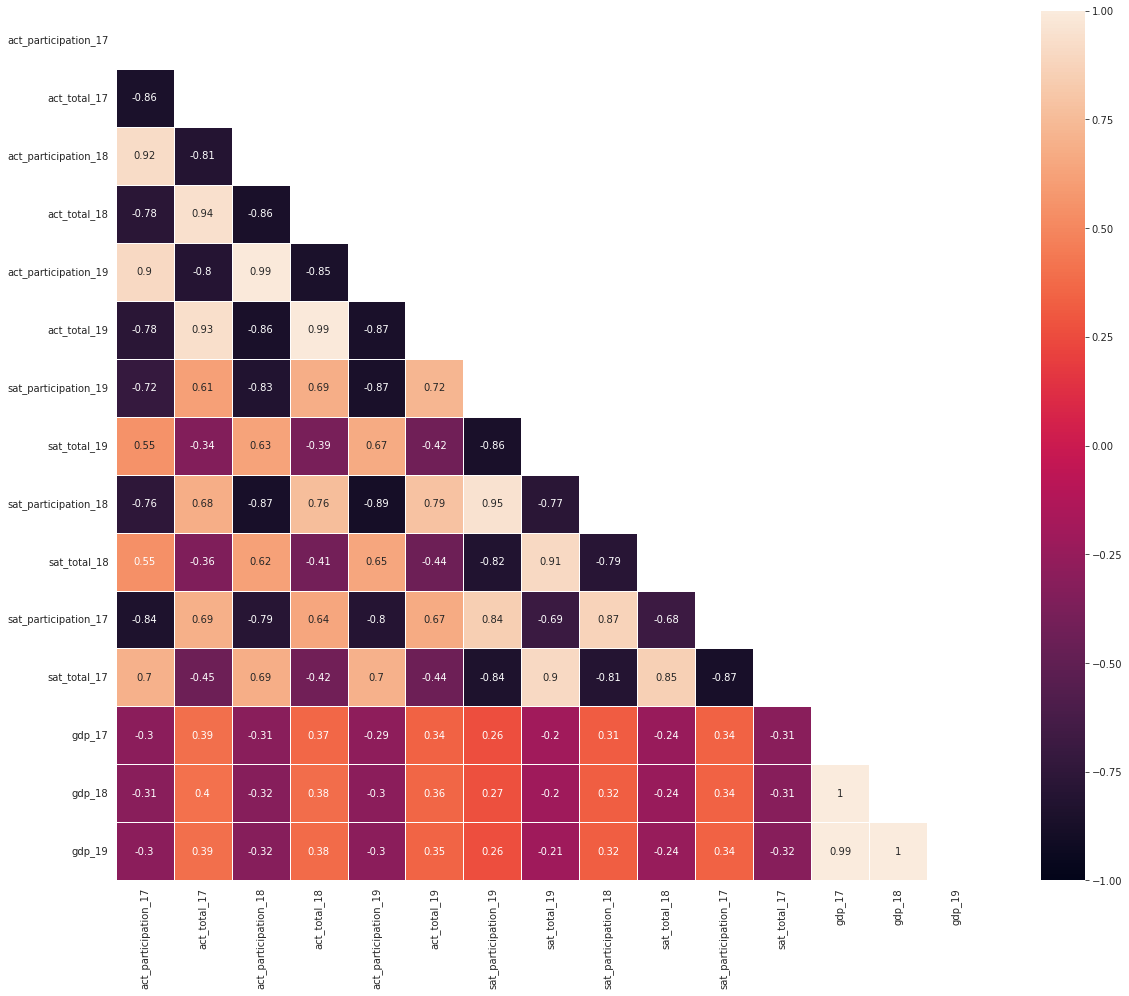

In [77]:
plt.figure(figsize=(20,16))
corr = test_gdp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidth = 0.5)

This heat map shows an overview of our datasets. Few interesting highlights on this heatmap: 
1. SAT participation rate is *negatively correlated* with ACT participation 
    - which means that States with higher participation rate in one test, will have lower participation rate in the other. This suggests that **student has tendency to focus on one test at a time.**
2. SAT total score and ACT composite score are also *negatively correlated*. This supports our first hypothesis in point #1.
3. SAT participation rate also has *negative correlation* with SAT composite score. 
    - States with **higher participation rate tend to have lower composite score**. This phenomena is also observed in ACT test.
4. Looking at the correlation between the SAT and ACT composite score for that year and comparing it to previous year, we observe there is *strong correlation* between the two. The correlation is even stronger between 2018 vs 2019 data compared to 2017 vs 2018 data for both tests. 
    - This indicates that States that do well are likely to do even better the following year. This makes sense as the schools that require any of these tests tend to give relevant assignments, mock tests and opportunities to write academic essay to improve their skills to prepare them for the test.
5. There is *weak correlation* between gdp and ACT composite result, however, it seems that this trend is not seen in SAT total scores. 
    - This might not be an accurate correlation as some of SAT/ ACT scores have low participation rates which is a limitation in this analysis. 


### Looking Participation Rate 

#### Overall

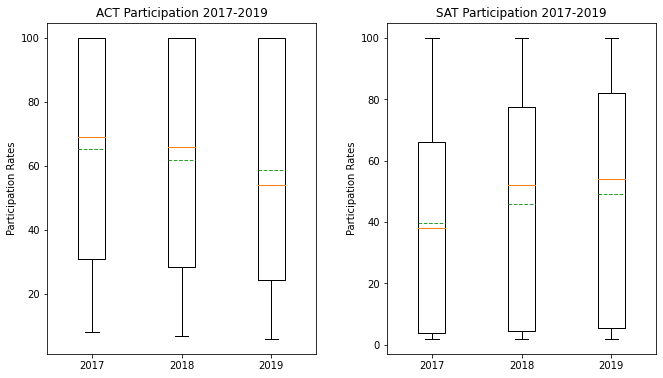

In [78]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
plt.tight_layout(pad=4)

data_1 = test_gdp['act_participation_17']
data_2 = test_gdp['act_participation_18']
data_3 = test_gdp['act_participation_19']
data_act = [data_1,data_2,data_3]
ax1.boxplot(data_act,labels=['2017','2018','2019'],showmeans=True,meanline=True)
ax1.set_ylabel('Participation Rates')
ax1.set_title('ACT Participation 2017-2019');


data_4 = test_gdp['sat_participation_17']
data_5 = test_gdp['sat_participation_18']
data_6 = test_gdp['sat_participation_19']
data_sat = [data_4,data_5,data_6]
ax2.boxplot(data_sat,labels=['2017','2018','2019'],showmeans=True,meanline=True)
ax2.set_ylabel('Participation Rates')
ax2.set_title('SAT Participation 2017-2019');

Following on the SAT revamping initiative in 2016, we can see the **SAT participation rate is steadily increasing** which is represented by the *green dotted lines*. This suggests that the new SAT has positive impact on increasing the participation rate.

|Year|Average ACT Participation Rates|Average SAT Participation Rates|
|---|---|---|
|2017|21.52|1126.1|
|2018|21.50|1120.02|
|2019|21.47|1113.08|

#### % Change throughout the Years

In [79]:
part_df= test_gdp[['state','act_participation_17','act_participation_18','act_participation_19','sat_participation_17','sat_participation_18','sat_participation_19']]

In [80]:
part_df['act_part_1718'] = part_df['act_participation_18'] - part_df['act_participation_17']
part_df['act_part_1819'] = part_df['act_participation_19'] - part_df['act_participation_18']
part_df['sat_part_1718'] = part_df['sat_participation_18'] - part_df['sat_participation_17']
part_df['sat_part_1819'] = part_df['sat_participation_19'] - part_df['sat_participation_18']

/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3683899730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_df['act_part_1718'] = part_df['act_participation_18'] - part_df['act_participation_17']
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3683899730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_df['act_part_1819'] = part_df['act_participation_19'] - part_df['act_participation_18']
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/36838

Text(0, 0.5, '')

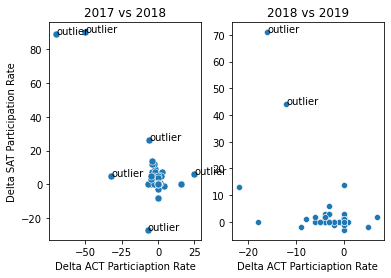

<Figure size 720x432 with 0 Axes>

In [81]:
fig , (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize=(10,6))
plt.tight_layout(pad=10)

ax1.set_xlabel('Delta ACT Particiaption Rate')
ax1.set_ylabel('Delta SAT Participation Rate')
ax1.set_title('2017 vs 2018')
for x,y in zip(part_df['act_part_1718'],part_df['sat_part_1718']):
        if (abs(x)>24) or (abs(y)>24):
            ax1.text(x, y, 'outlier', horizontalalignment='left', size='medium', color='black')
sns.scatterplot(data=part_df, x='act_part_1718',y='sat_part_1718',ax=ax1,s=50);


ax2.set_xlabel('Delta ACT Particiaption Rate')
ax2.set_title('2018 vs 2019')
for x,y in zip(part_df['act_part_1819'],part_df['sat_part_1819']):
        if (abs(x)>24) or (abs(y)>24):
            ax2.text(x, y, 'outlier', horizontalalignment='left', size='medium', color='black')
sns.scatterplot(data=part_df, x='act_part_1819',y='sat_part_1819',ax=ax2);
ax2.set_ylabel(None)

#### Looking at the Outliers where Delta is 25% and above

In [82]:
part_df[(abs(part_df['act_part_1718'])>24)][['state','act_part_1718','act_participation_17','act_participation_18','sat_participation_17','sat_participation_18']]

,state,act_part_1718,act_participation_17,act_participation_18,sat_participation_17,sat_participation_18
1,Alaska,-32.0,65.0,33.0,38.0,43.0
5,Colorado,-70.0,100.0,30.0,11.0,100.0
13,Illinois,-50.0,93.0,43.0,9.0,99.0
35,Ohio,25.0,75.0,100.0,12.0,18.0


In [83]:
part_df[(abs(part_df['sat_part_1718'])>24)][['state','act_part_1718','act_participation_17','act_participation_18','sat_participation_17','sat_participation_18']]

,state,act_part_1718,act_participation_17,act_participation_18,sat_participation_17,sat_participation_18
5,Colorado,-70.0,100.0,30.0,11.0,100.0
9,Florida,-7.0,73.0,66.0,83.0,56.0
13,Illinois,-50.0,93.0,43.0,9.0,99.0
39,Rhode Island,-6.0,21.0,15.0,71.0,97.0


In [84]:
part_df[(abs(part_df['act_part_1819'])>24)][['state','act_part_1819','act_participation_18','act_participation_19','sat_participation_18','sat_participation_19']]

,state,act_part_1819,act_participation_18,act_participation_19,sat_participation_18,sat_participation_19


In [85]:
part_df[(abs(part_df['sat_part_1819'])>24)][['state','act_part_1819','act_participation_18','act_participation_19','sat_participation_18','sat_participation_19']]

,state,act_part_1819,act_participation_18,act_participation_19,sat_participation_18,sat_participation_19
9,Florida,-12.0,66.0,54.0,56.0,100.0
48,West Virginia,-16.0,65.0,49.0,28.0,99.0


SAT secured state policy with 2 states in 2018:
- ACT required states: Ohio. Participation in ACT is increased from 75% to 100% in 2018 due to [state policy that required students to take either ACT or SAT. ](https://fordhaminstitute.org/ohio/commentary/ohios-average-act-score-dropped-thats-not-bad-thing)
- SAT required states: **Colorado and Illinois**. These states drastic increase is due to **state policy** impose to these states

The same reason is found in the following year. The new state policy increases the participant rate in **West Virginia** for SAT.
- While Florida has no preference against any of the test, state policy requires them to take either one of the tests


### Understanding the ACT & SAT Scores 

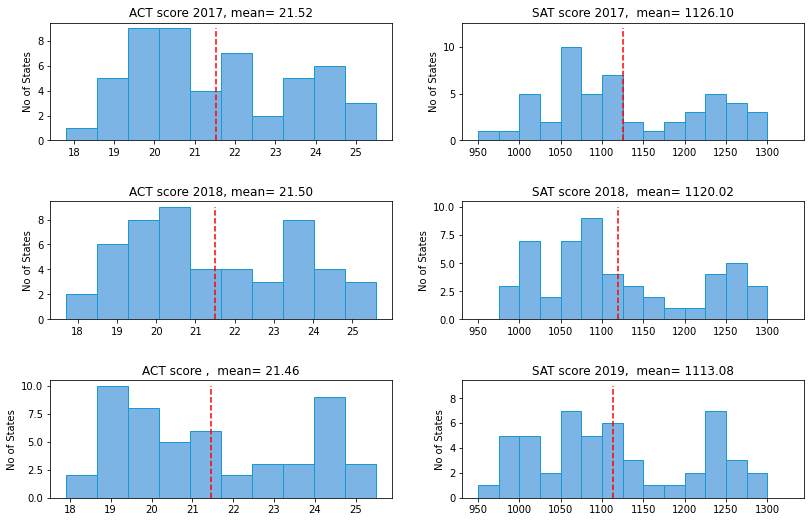

In [86]:
#HISTOGRAM
fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(12,8))
plt.tight_layout(pad=4)

ax[0,0].set_title('ACT score 2017, mean= 21.52')
ax[0,0].vlines(test_gdp['act_total_17'].mean(),0,9,color='red',linestyles='dashed')
ax[0,0].set_ylabel('No of States')
ax[0,0].hist(test_gdp['act_total_17'],facecolor = '#7cb4e5', edgecolor='#169acf');

ax[1,0].set_title('ACT score 2018, mean= 21.50')
ax[1,0].vlines(test_gdp['act_total_18'].mean(),0,9,color='red',linestyles='dashed')
ax[1,0].set_ylabel('No of States')
ax[1,0].hist(test_gdp['act_total_18'],facecolor = '#7cb4e5', edgecolor='#169acf');

ax[2,0].set_title('ACT score ,  mean= 21.46')
ax[2,0].vlines(test_gdp['act_total_19'].mean(),0,10,color='red',linestyles='dashed')
ax[2,0].set_ylabel('No of States')
ax[2,0].hist(test_gdp['act_total_19'],facecolor = '#7cb4e5', edgecolor='#169acf');

ax[0,1].set_title('SAT score 2017,  mean= 1126.10')
ax[0,1].vlines(test_gdp['sat_total_17'].mean(),0,12,color='red',linestyles='dashed')
ax[0,1].set_ylabel('No of States')
ax[0,1].hist(test_gdp['sat_total_17'],facecolor = '#7cb4e5', edgecolor='#169acf',bins=np.arange(950,1350,25));

ax[1,1].set_title('SAT score 2018,  mean= 1120.02')
ax[1,1].vlines(test_gdp['sat_total_18'].mean(),0,10,color='red',linestyles='dashed')
ax[1,1].set_ylabel('No of States')
ax[1,1].hist(test_gdp['sat_total_18'],facecolor = '#7cb4e5', edgecolor='#169acf',bins=np.arange(950,1350,25));

ax[2,1].set_title('SAT score 2019,  mean= 1113.08')
ax[2,1].vlines(test_gdp['sat_total_19'].mean(),0,9,color='red',linestyles='dashed')
ax[2,1].set_ylabel('No of States')
ax[2,1].hist(test_gdp['sat_total_19'],facecolor = '#7cb4e5', edgecolor='#169acf',bins=np.arange(950,1350,25));

Assuming we consider all score despite the participation rates (potential selection bias), there is a **decreasing trend on the average total score** for both ACT and SAT:
- ACT dropped by 1% from 2017 to 2018 and 1.9% from 2018 to 2019
- SAT dropped by 0.5% from 2017 to 2018 and 0.6% from 2018 to 2019

### Analyzing How GDP Influence Score

> [Wealthier student tend to score better](https://www.cnbc.com/2019/10/03/rich-students-get-better-sat-scores-heres-why.html). Is this a baseless statement? Let's see how 2017-2019 data is

#### Categorizing GDP to 5 catefories:
1. <40k
2. $40-50k
3. $50-60k #average lies within this
4. $60-70k
5. \>70k


In [87]:
def gdp_class(x):
    if x>70000:
        return '>$70k'
    elif (x>60000) and (x<70000):
        return '$60-70k'
    elif (x>50000) and (x<60000):
        return '$50-60k'
    elif (x>40000) and (x<50000):
        return '$40-50k'
    else:
        return '<$40k'

In [88]:
test_gdp['gdp_17_cat'] = test_gdp['gdp_17'].apply(lambda x: gdp_class(x))
test_gdp['gdp_18_cat'] = test_gdp['gdp_18'].apply(lambda x: gdp_class(x))
test_gdp['gdp_19_cat'] = test_gdp['gdp_19'].apply(lambda x: gdp_class(x))

In [89]:
test_gdp[['state','gdp_17_cat','gdp_18_cat','gdp_19_cat']].head()

,state,gdp_17_cat,gdp_18_cat,gdp_19_cat
0,Alabama,<$40k,$40-50k,$40-50k
1,Alaska,$60-70k,>$70k,>$70k
2,Arizona,<$40k,$40-50k,$40-50k
3,Arkansas,<$40k,<$40k,<$40k
4,California,$60-70k,$60-70k,>$70k


In [90]:
#grouping our data based on gdp category
test_2017= test_gdp.groupby('gdp_17_cat').mean()[['act_total_17','act_participation_17','sat_total_17','sat_participation_17']]
test_2018= test_gdp.groupby('gdp_18_cat').mean()[['act_total_18','act_participation_18','sat_total_18','sat_participation_18']]
test_2019= test_gdp.groupby('gdp_19_cat').mean()[['act_total_19','act_participation_19','sat_total_19','sat_participation_19']]

In [91]:
gdp_based_data_1718 = pd.concat([test_2017,test_2018],axis=1)
gdp_based_data = pd.concat([gdp_based_data_1718,test_2019],axis=1)
gdp_based_data.reset_index(inplace=True)
gdp_based_data

,index,act_total_17,act_participation_17,sat_total_17,sat_participation_17,act_total_18,act_participation_18,sat_total_18,sat_participation_18,act_total_19,act_participation_19,sat_total_19,sat_participation_19
0,$40-50k,21.041176,74.294118,1149.294118,28.529412,20.464706,75.529412,1128.470588,32.235294,20.843750,62.750000,1094.000000,51.812500
1,$50-60k,22.080000,58.533333,1134.933333,41.266667,21.922222,60.555556,1141.500000,45.000000,21.072222,69.111111,1151.666667,33.166667
2,$60-70k,23.100000,43.571429,1080.142857,62.428571,22.928571,36.571429,1091.285714,70.000000,22.800000,40.800000,1083.400000,70.900000
3,<$40k,20.245455,77.272727,1123.454545,35.363636,19.780000,80.200000,1095.000000,38.200000,18.850000,100.000000,1189.000000,4.500000
4,>$70k,24.200000,32.000000,950.000000,100.000000,23.600000,29.250000,1069.000000,73.500000,23.240000,27.200000,1064.200000,71.600000


In [92]:
gdp_based_data.rename(columns={'index':'Real GDP per Capita'},inplace=True)

#### How each GDP categories participation rates

In [93]:
mean_df=pd.DataFrame({
    'Real GDP per Capita':'Mean',
    'act_total_17': [test_gdp['act_total_17'].mean()],
    'act_participation_17': [test_gdp['act_participation_17'].mean()],
    'sat_total_17': [test_gdp['sat_total_17'].mean()],
    'sat_participation_17': [test_gdp['sat_participation_17'].mean()],
    
    'act_total_18': [test_gdp['act_total_18'].mean()],
    'act_participation_18': [test_gdp['act_participation_18'].mean()],
    'sat_total_18': [test_gdp['sat_total_18'].mean()],
    'sat_participation_18': [test_gdp['sat_participation_18'].mean()],

    'act_total_19': [test_gdp['act_total_19'].mean()],
    'act_participation_19': [test_gdp['act_participation_19'].mean()],
    'sat_total_19': [test_gdp['sat_total_19'].mean()],
    'sat_participation_19': [test_gdp['sat_participation_19'].mean()],
})
gdp_based_data=gdp_based_data.append(mean_df)

/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/582232677.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdp_based_data=gdp_based_data.append(mean_df)


In [94]:
gdp_based_data.reset_index(inplace=True)
act_total_gdp=gdp_based_data[['act_participation_17','act_participation_18','act_participation_19']].T
sat_total_gdp=gdp_based_data[['sat_participation_17','sat_participation_18','sat_participation_19']].T
act_total_gdp.rename(columns={0:'$40-50k',1:'$50-60k',2:'$60-70k',3:'<$40k',4:'>70k',5:'Mean'},inplace=True)
sat_total_gdp.rename(columns={0:'$40-50k',1:'$50-60k',2:'$60-70k',3:'<$40k',4:'>70k',5:'Mean'},inplace=True)
act_total_gdp

,$40-50k,$50-60k,$60-70k,<$40k,>70k,Mean
act_participation_17,74.294118,58.533333,43.571429,77.272727,32.00,65.254902
act_participation_18,75.529412,60.555556,36.571429,80.200000,29.25,61.725490
act_participation_19,62.750000,69.111111,40.800000,100.000000,27.20,58.666667


In [95]:
act_total_gdp.reset_index(inplace=True)
sat_total_gdp.reset_index(inplace=True)
act_total_gdp

,index,$40-50k,$50-60k,$60-70k,<$40k,>70k,Mean
0,act_participation_17,74.294118,58.533333,43.571429,77.272727,32.00,65.254902
1,act_participation_18,75.529412,60.555556,36.571429,80.200000,29.25,61.725490
2,act_participation_19,62.750000,69.111111,40.800000,100.000000,27.20,58.666667


In [96]:
#renaming the columns
act_total_gdp['index'][0]='2017'
act_total_gdp['index'][1]='2018'
act_total_gdp['index'][2]='2019'

sat_total_gdp['index'][0]='2017'
sat_total_gdp['index'][1]='2018'
sat_total_gdp['index'][2]='2019'

/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3738640743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_total_gdp['index'][0]='2017'
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3738640743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_total_gdp['index'][1]='2018'
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3738640743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

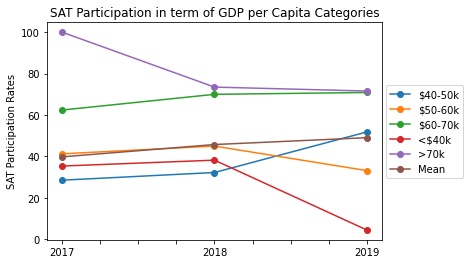

In [97]:
sat_total_gdp.set_index("index").plot(marker='o');
plt.ylabel("SAT Participation Rates")
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('SAT Participation in term of GDP per Capita Categories');

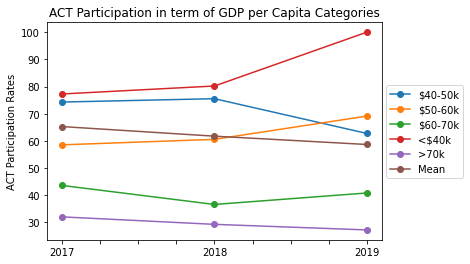

In [98]:
act_total_gdp.set_index("index").plot(marker='o');
plt.ylabel("ACT Participation Rates")
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('ACT Participation in term of GDP per Capita Categories');

ACT Participation is **negatively correlated** to SAT Participation.
It is observed clearly in states with *GDP per capita above the national average (>$60,000), they tend to join SAT*. In correlation to this, the ACT participation rate from this group is very low <br>
On the other hand, *States with lower GDP per capita (<40k) has tendency to take ACT*, while there is low SAT participation. 

This indicates that most of the time one will focus in one test only. This is quite understandable as student takes this test on top of their base curriculum. Therefore, there will be limited time for them to prepare and focusing on one test is a wise choice to maximize their score


#### [GDP vs Score] Considering All Data Points

In [99]:
score_gdp_2017=test_gdp[['state','act_total_17','sat_total_17','gdp_17_cat']].sort_values('gdp_17_cat')
score_gdp_2017.head()

,state,act_total_17,sat_total_17,gdp_17_cat
25,Missouri,20.4,1271,$40-50k
28,Nevada,17.8,1116,$40-50k
33,North Carolina,19.1,1081,$40-50k
49,Wisconsin,20.5,1291,$40-50k
22,Michigan,24.1,1005,$40-50k


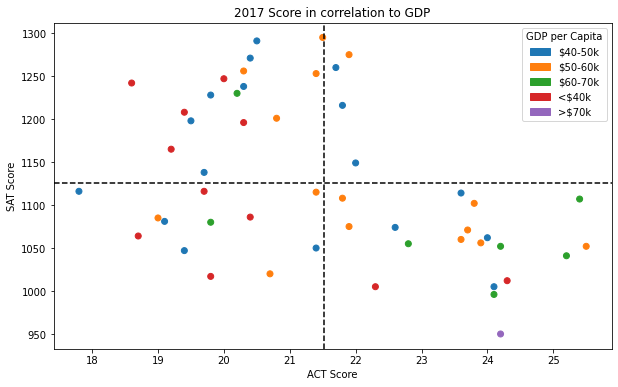

In [100]:
# plotting all ACT and SAT score based on GDP categories in 2017 where the dotted lines are the mean of each test
import matplotlib.patches
levels, categories = pd.factorize(score_gdp_2017['gdp_17_cat'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.figure(figsize=(10,6))
plt.scatter(score_gdp_2017['act_total_17'],score_gdp_2017['sat_total_17'], c=colors)
plt.gca().set(xlabel='ACT Score', ylabel='SAT Score', title='2017 Score in correlation to GDP')
plt.legend(handles=handles, title='GDP per Capita')
plt.axvline(x=21.52, color='black', label='axvline - full height',ls='--')
plt.axhline(y=1126.10, color='black', label='axvline - full height',ls='--')

In [101]:
score_gdp_2018=test_gdp[['state','act_total_18','sat_total_18','gdp_18_cat']].sort_values('gdp_18_cat')
score_gdp_2018.head()

,state,act_total_18,sat_total_18,gdp_18_cat
0,Alabama,19.1,1166,$40-50k
45,Vermont,24.1,1120,$40-50k
44,Utah,20.4,1010,$40-50k
42,Tennessee,19.6,1231,$40-50k
36,Oklahoma,19.3,1062,$40-50k


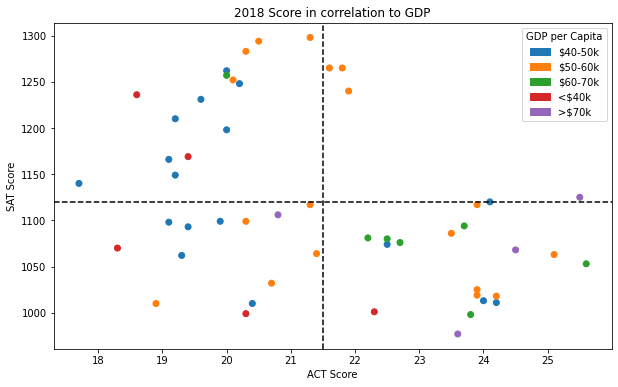

In [102]:
# plotting all ACT and SAT score based on GDP categories in 2018 where the dotted lines are the mean of each test
levels, categories = pd.factorize(score_gdp_2018['gdp_18_cat'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.figure(figsize=(10,6))
plt.scatter(score_gdp_2018['act_total_18'],score_gdp_2018['sat_total_18'], c=colors)
plt.gca().set(xlabel='ACT Score', ylabel='SAT Score', title='2018 Score in correlation to GDP')
plt.legend(handles=handles, title='GDP per Capita')
plt.axvline(x=21.50, color='black', label='axvline - full height',ls='--')
plt.axhline(y=1120.02, color='black', label='axvline - full height',ls='--')

In [103]:
score_gdp_2019=test_gdp[['state','act_total_19','sat_total_19','gdp_19_cat']].sort_values('gdp_19_cat')
score_gdp_2019.head()

,state,act_total_19,sat_total_19,gdp_19_cat
0,Alabama,18.9,1143,$40-50k
48,West Virginia,20.8,943,$40-50k
45,Vermont,24.1,1106,$40-50k
42,Tennessee,19.4,1220,$40-50k
40,South Carolina,18.8,1030,$40-50k


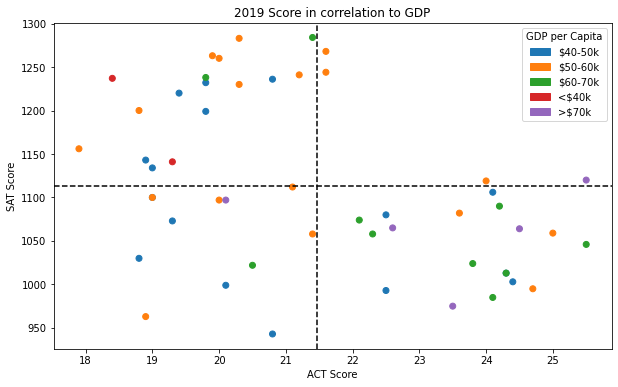

In [104]:
# plotting all ACT and SAT score based on GDP categories in 2019 where the dotted lines are the mean of each test
levels, categories = pd.factorize(score_gdp_2019['gdp_19_cat'])
colors = [plt.cm.tab10(i) for i in levels] # using the "tab10" colormap
handles = [matplotlib.patches.Patch(color=plt.cm.tab10(i), label=c) for i, c in enumerate(categories)]

plt.figure(figsize=(10,6))
plt.scatter(score_gdp_2019['act_total_19'],score_gdp_2019['sat_total_19'], c=colors)
plt.gca().set(xlabel='ACT Score', ylabel='SAT Score', title='2019 Score in correlation to GDP')
plt.legend(handles=handles, title='GDP per Capita')
plt.axvline(x=21.47, color='black', label='axvline - full height',ls='--')
plt.axhline(y=1113.08, color='black', label='axvline - full height',ls='--')

As part of the limitiation, there is a chance that there is state with very high score but very low participation rates. This is due to seletion bias as the sample selection which **might not represent the whole population of that state**.<br>

There are 4 quadrants:
1. First quadrant: top left. SAT score above average and ACT score below average
2. Second quadrant: top right. SAT score above average and ACT score above average
3. Third quadrant: bottom left. SAT score below average and ACT score below average
4. Forth quadrant: bottom right. SAT score below average and ACT score above average

*Assuming that $50-60k to be the average real GDP per capita.* First, we can see for **more states with above average GDP to have above average score**. This may suggest that those higher GDP states have better access for test preparation, thus, they may perform better during the test.

Second if we see the score shift from 2017 to 2019, **states with GDP in the range of $50,000-70,000 tend to slowly perform even better on SAT test**.

We might not see a strong correlation in heat map, but from this scatterplot we can see that higher **GDP might be one of the factor that some states perform better than others**.



#### [GDP vs Score] Considering Participation Rates > 50%

In [105]:
act_17_above_50 = test_gdp[test_gdp['act_participation_17']>50].groupby('gdp_17_cat')[['state','act_total_17']].mean()
act_18_above_50 = test_gdp[test_gdp['act_participation_18']>50].groupby('gdp_18_cat')[['state','act_total_18']].mean()
act_19_above_50 = test_gdp[test_gdp['act_participation_19']>50].groupby('gdp_19_cat')[['state','act_total_19']].mean()

In [106]:
act_1718_above_50 = pd.concat([act_17_above_50,act_19_above_50],axis=1)
act_above_50 = pd.concat([act_1718_above_50,act_19_above_50],axis=1)
act_above_50=act_above_50.T

In [107]:
act_above_50.reset_index(inplace=True)
act_above_50

,index,$40-50k,$50-60k,$60-70k,<$40k
0,act_total_17,20.261538,20.900000,20.0,19.566667
1,act_total_19,19.490000,19.958333,20.6,18.850000
2,act_total_19,19.490000,19.958333,20.6,18.850000


In [108]:
act_above_50['index'][0]='2017'
act_above_50['index'][1]='2018'
act_above_50['index'][2]='2019'

/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/459786008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_above_50['index'][0]='2017'
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/459786008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_above_50['index'][1]='2018'
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/459786008.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

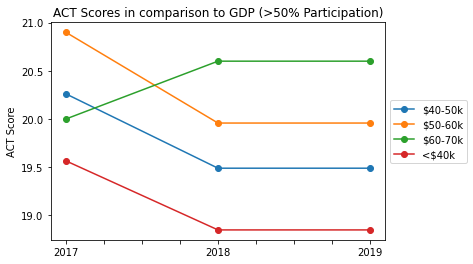

In [109]:
act_above_50.set_index("index").plot(marker='o');
plt.ylabel("ACT Score")
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title("ACT Scores in comparison to GDP (>50% Participation)");

In [110]:
sat_17_above_50 = test_gdp[test_gdp['sat_participation_17']>50].groupby('gdp_17_cat')[['state','sat_total_17']].mean()
sat_18_above_50 = test_gdp[test_gdp['sat_participation_18']>50].groupby('gdp_18_cat')[['state','sat_total_18']].mean()
sat_19_above_50 = test_gdp[test_gdp['sat_participation_19']>50].groupby('gdp_19_cat')[['state','sat_total_19']].mean()

In [111]:
sat_1718_above_50 = pd.concat([sat_17_above_50,sat_19_above_50],axis=1)
sat_above_50 = pd.concat([sat_1718_above_50,sat_19_above_50],axis=1)
sat_above_50=sat_above_50.T

In [112]:
sat_above_50.reset_index(inplace=True)
sat_above_50

,index,$40-50k,$50-60k,$60-70k,<$40k,>$70k
0,sat_total_17,1061.000000,1065.125,1050.2,1011.333333,950.0
1,sat_total_19,1029.666667,1075.000,1039.0,NaN,1056.0
2,sat_total_19,1029.666667,1075.000,1039.0,NaN,1056.0


In [113]:
sat_above_50['index'][0]='2017'
sat_above_50['index'][1]='2018'
sat_above_50['index'][2]='2019'

/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3843555193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_above_50['index'][0]='2017'
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3843555193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat_above_50['index'][1]='2018'
/var/folders/tg/8mpzp58s7wd9h25zt2bffqd00000gn/T/ipykernel_23356/3843555193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

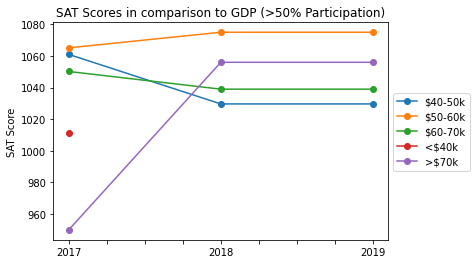

In [114]:
sat_above_50.set_index("index").plot(marker='o');
plt.ylabel("SAT Score")
plt.xlabel(None)
plt.legend(bbox_to_anchor=(1.1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title("SAT Scores in comparison to GDP (>50% Participation)");

Interestingly when we filter those states and take those with >50% participation rate, there are some interesting observation:
1. *Despite having the highest participation rate for GDP <$40,000, the average ACT score is the lowest* and we don't even see any data that has participation rate>50% in 2018 and 2019 SAT score. 
2. On the other hand, *we don't observe any data for those with GDP>$70,000 with participation rate>50% in ACT for all 3 consecutive years.*


**Therefore, we can infer that states with GDP>$70,000 have preference towards SAT, while states with GDP<$40,000 have preference towards ACT**

### Chloropleth for 2019 Data

In [115]:
import json
us_states = json.load(open("us-states.json",'r'))

In [116]:
#create a relation for chloropleth to refer to
state_id_map = {}
for i in range(0,len(us_states['features'])):
    state_id_map[us_states['features'][i]['properties']['name']] = us_states['features'][i]['id']
state_id_map['District of Columbia'] = 'DC'

In [117]:
test_gdp['id'] = test_gdp['state'].apply(lambda x: state_id_map[x])

In [118]:
import plotly.express as px
import nbformat

#### US 2019 ACT Participation Rates

In [119]:
fig = px.choropleth(test_gdp,locations='id',geojson=us_states,color='act_participation_19',hover_name='state',hover_data=['act_total_19','act_participation_19'],color_continuous_scale='ylorrd')
fig.update_geos(fitbounds="locations",visible=False)

#### US 2019 SAT Participation Rates

In [120]:
fig2 = px.choropleth(test_gdp,locations='id',geojson=us_states,color='sat_participation_19',hover_name='state',hover_data=['sat_total_19','sat_participation_19'],color_continuous_scale='ylorrd')
fig2.update_geos(fitbounds="locations",visible=False)

**Looking at the MAP 2019 participation rates for both test, it is visually clear that each state has certain preference to one test only.**

### Selecting States for College Board Recommendation

> Four underlying reasons from our previous analysis:<br>
1. From the boxplot of participation rates, the increase of participation rate from one test means decrease for the other one.
2. Coming from the first pointer, it is rather hard to shift the preference from one test, unless it is due to new state policy.
    - Shall strategically choose the **states with no preference to any test** because by choosing those states we will let more students to have the opportunity to go to college. 
3. States with GDP>$70,000 have preference towards SAT, while states with GDP<$40,000 have preference towards ACT.
    - Shall put our focus on states with **GDP less than <$50,000 (below average)**. This is to stay true our mission as College Board where we would like to connect student to college success. Hence, it must be available to all students.
4. As these tests are arguably an early indication of college readiness, we shall make sure that we prepare our students better by helping them to get better scores.
    - Shall try to help **states with below average score**

In [121]:
preference_condition = test_gdp['preference']=='No Preference'
gdp_condition = (test_gdp['gdp_19_cat']=='<$40k')|(test_gdp['gdp_19_cat']=='$40-50k')
score_condition = (test_gdp['act_total_19']<(test_gdp['act_total_19'].mean()))&(test_gdp['sat_total_19']<(test_gdp['sat_total_19'].mean()))

In [122]:
test_gdp[preference_condition&gdp_condition&score_condition][['state','act_participation_19','act_total_19','sat_participation_19','sat_total_19','preference','gdp_19_cat']]

,state,act_participation_19,act_total_19,sat_participation_19,sat_total_19,preference,gdp_19_cat
9,Florida,54.0,20.1,100.0,999,No Preference,$40-50k
31,New Mexico,63.0,19.3,18.0,1073,No Preference,$40-50k
40,South Carolina,78.0,18.8,68.0,1030,No Preference,$40-50k


# Conclusion and Recommendation <a name="conclusion"></a>

From the ACT and SAT datasets that we have, we can find found out that students have limited time to study for the test. Therefore, they are focusing one at a time. As what we have expected, real GDP per Capita influences the score test. Higher GDP per capita tent to do better in SAT, while lower GDP per capita tend to have higher ACT participation rates but score lower average score. 

Keeping in mind of our four criteria:
1. States with no preference to any test 
2. States with GDP less than <$50,000 (below average)
3. States with below average score
4. States with low SAT participation rate (<50%)

Excluding Florida with SAT participation rate of 100%, **I would recommend that College Board put more attention to New Mexico to increase the SAT participation rates**.

Looking at the data of delta participation rates change throughout the years, **having an agreement with the state to create state policy for high school student graduation requiremnet** might be the most effective way to achieve this.

However, it is good for College Board to **bring solution on bridging the gap of test preparation access for students** in that state such as:
1. Providing a free access to any test preparation source for free
2. Schedule a sharing session to parents and students so they are aware of the [fee-waiver scheme](https://parents.collegeboard.org/college-board-programs/sat#)
3. Collaborate with schools to create SAT School Day so that students can take test during the school

Aside from that, there is a rise on the test optional policy for college admission, thus, **College Board must strengthen their marketing strategy** such as by leveraging the fact that SAT can open doors to full ride scholarship.